# The I-94 Traffic Dataset

This project is about the analyzing and visualizing the westbound (east to west) traffic in I-94, that lasts 2500 km long, begins from Great Lakes and connects 7 states. 

Dataset consists of weather conditons and traffic volume collected from 02/10/2012 to 30/09/2018 each hour.

Our main goal is to find out when and at what condition (i.e. indicators) traffic is heavier than usual. 

In [3]:
import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Analyzing Traffic Volume

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


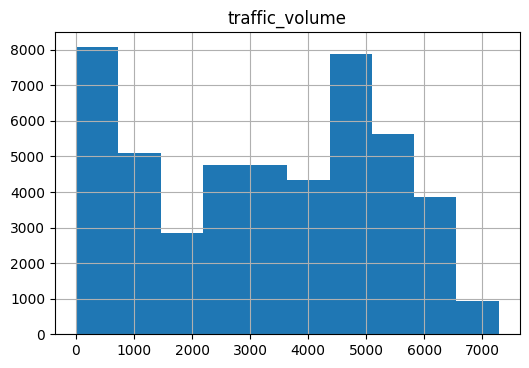

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic.hist("traffic_volume")
print(traffic['traffic_volume'].describe())
plt.plot()
plt.show()

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic_day = traffic[(traffic['date_time'].dt.hour > 6) & (traffic['date_time'].dt.hour< 19)]
traffic_night = traffic[(traffic['date_time'].dt.hour > 18) | (traffic['date_time'].dt.hour< 7)]

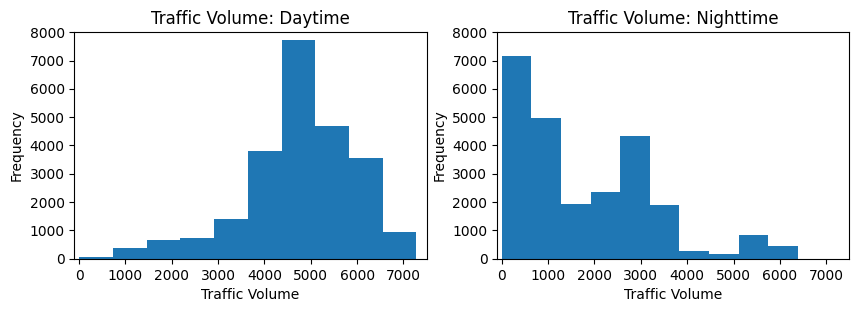

In [8]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [9]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the plot above, we can see that Daytime Traffic is left-skewed, thus in general their values are high. 75% of the time we have traffic volume of 4252 and above. 

While Nighttime Traffic is right-skewed with smaller values. 75% of the time traffic is lower than 2819. 

We were asked to focus on heavy traffic, thus data with nighttime can be skipped. We go through with daytime traffic.

# Time Indicators

1. Month

In [11]:
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-11-e9f01761f546>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

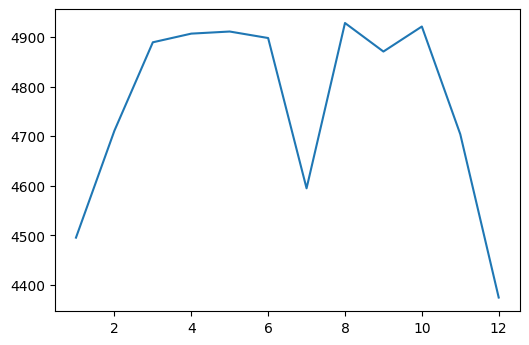

In [12]:
plt.plot(by_month['traffic_volume'])

If we divide data into months, we have values between 4300 and 5000. 
Interestingly, we have a significant drop after October to December and from June to July. The possible reason for that can be the holidays and vacations.

It stays constant during Spring and has slight changes during Autumn.

2. Week

In [13]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-13-832987ecbb3b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

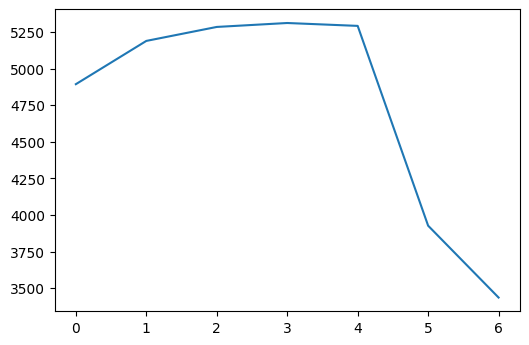

In [14]:
plt.plot(by_dayofweek['traffic_volume'])

By observing weekly traffic volume averages, we notice slight increase on Tuesday, and, in general, it keeps constant (around 5300). But the dramatic fall happens on weekends by showing 3927 and 3436 respectively.

Possible reason for that is the absence of work and unnecessity to drive during weekends.

3. Hour

In [15]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
business_days = traffic_day.copy()[traffic_day['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-15-b1a5bec86008>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(1500.0, 6300.0)

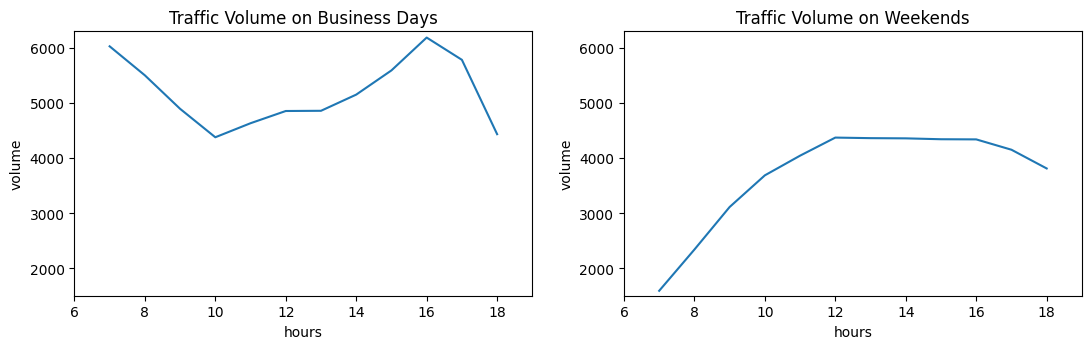

In [16]:
plt.figure(figsize=(13, 3.5))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title("Traffic Volume on Business Days")
plt.xlabel("hours")
plt.ylabel("volume")
plt.xlim(6, 19)
plt.ylim(1500, 6300)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title("Traffic Volume on Weekends")
plt.xlabel("hours")
plt.ylabel("volume")
plt.xlim(6, 19)
plt.ylim(1500, 6300)


First thing to mention is that traffic volume on business days are far greater than on weekends (floor on business days = ceiling on weekends). Rush hours on business days are 7 AM and 4 PM respectively. By 10 AM, most of the workers are at work and by 6 PM they are presumely at home. Thus, from 10 to 13 o'clock we have very gradual increase.

On the other hand, graph shows sharp rise from 7 to 12 on weekends, being 3 times bigger than initial value (1500 -> 4500). But after that it stays constant and has modest decline.

# Weather Indicators

In [17]:
traffic_day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452,6.522218,2.983457,12.431419
std,13.298885,63.62932,0.008853,37.564588,1174.546482,3.407585,2.007363,3.473405
min,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000,4.000000,1.000000,9.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000,7.000000,3.000000,12.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000,9.000000,5.000000,15.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000,12.000000,6.000000,18.000000


In [18]:
traffic_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  dayofweek            23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB


In [19]:
traffic_day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13


In [20]:
print(traffic_day['traffic_volume'].corr(traffic_day['temp']))
print(traffic_day['traffic_volume'].corr(traffic_day['rain_1h']))
print(traffic_day['traffic_volume'].corr(traffic_day['snow_1h']))
print(traffic_day['traffic_volume'].corr(traffic_day['clouds_all']))

0.12831656852303905
0.0036965098350734324
0.001265349847175986
-0.03293234866163948


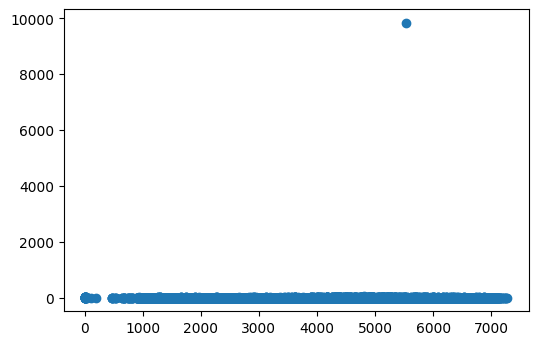

In [21]:
plt.scatter(traffic_day['traffic_volume'], traffic_day['rain_1h'])

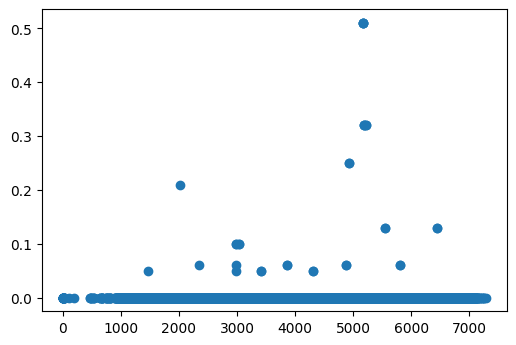

In [22]:
plt.scatter(traffic_day['traffic_volume'], traffic_day['snow_1h'])

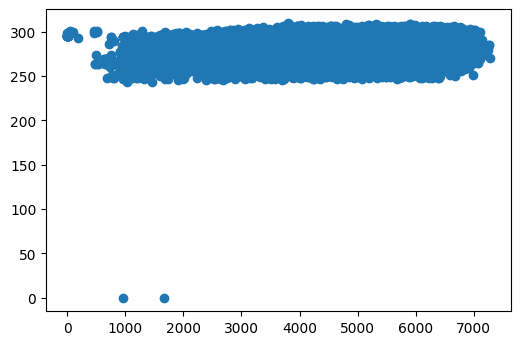

In [23]:
plt.scatter(traffic_day['traffic_volume'], traffic_day['temp'])

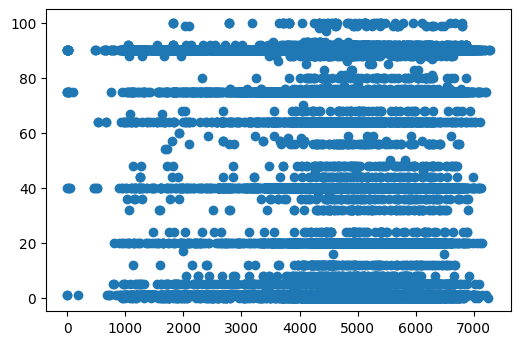

In [24]:
plt.scatter(traffic_day['traffic_volume'], traffic_day['clouds_all'])

From the observations above, it can be seen that there is no correlation between weather-related numerical data and volume of traffic. So, let us go through weather-related categorical data, i.e. _weather_main_ and _weather_description_ columns.

In [26]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

In [27]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


In [28]:
by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2.895540,12.453052
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2.998210,12.811314
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,3.028777,11.697842
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2.977253,12.633421
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,0.500000,13.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2.896552,12.275862


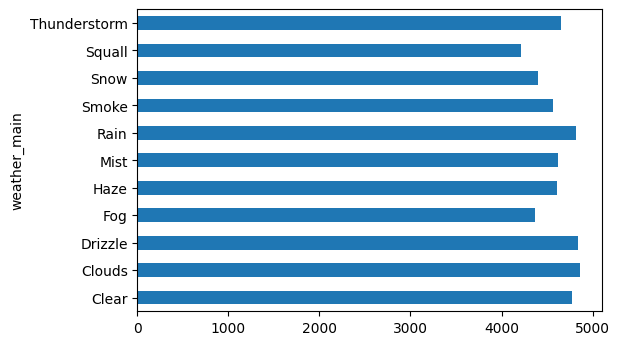

In [35]:
#plt.barh(by_weather_main['traffic_volume'], width=0.4)
by_weather_main['traffic_volume'].plot.barh()

From the view above, there's no significant difference between correlations of weather types and traffic volume. None of them exceeds 5000 and each of them exceeds 4000.

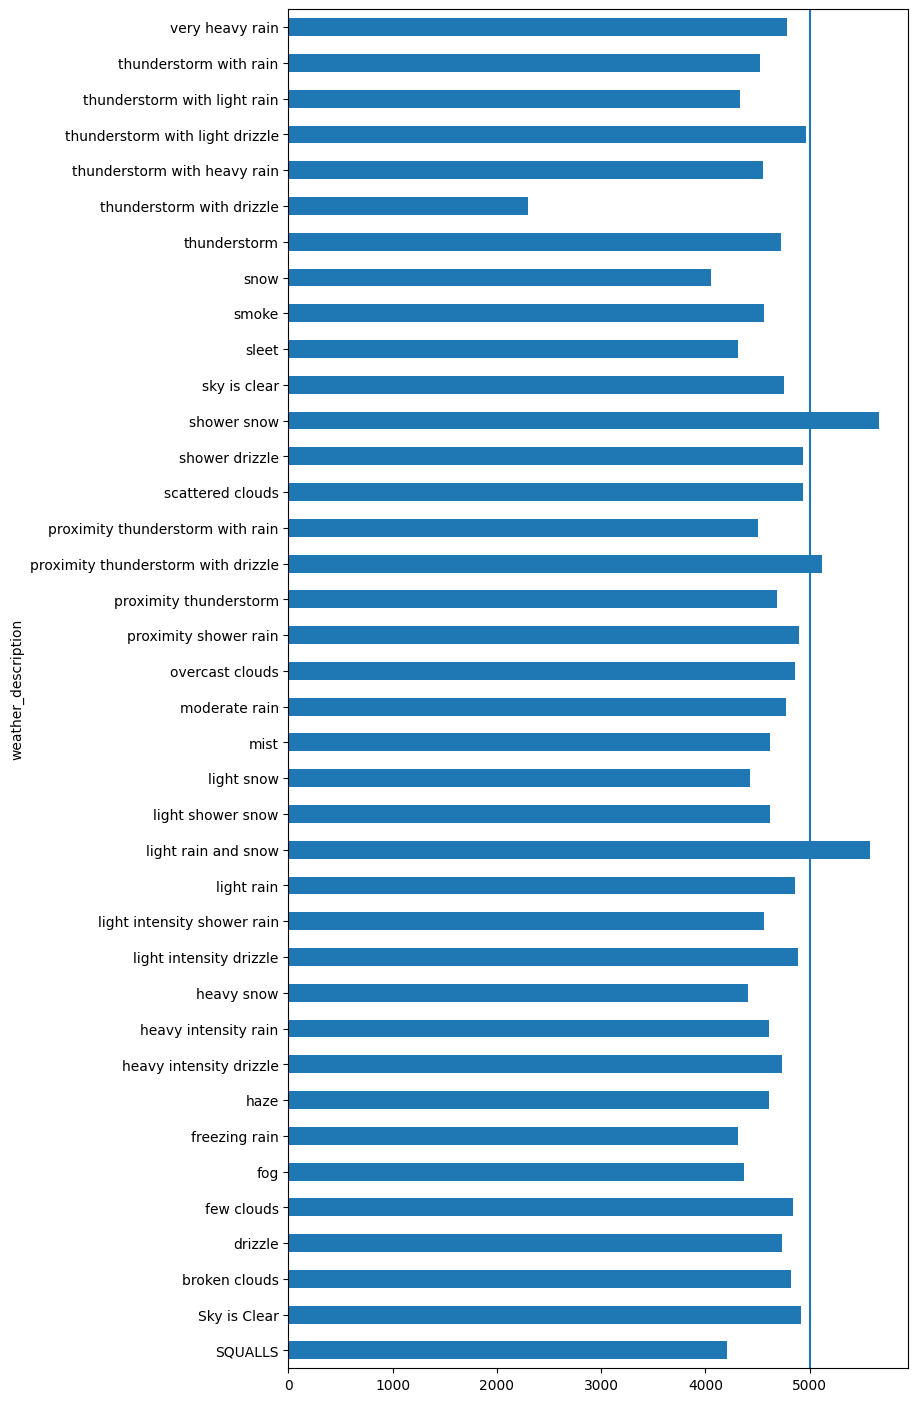

In [41]:
by_weather_description['traffic_volume'].plot.barh(figsize=(8, 18)).axvline(x=5000)

On the other hand, by_weather_description shows the bigger picture and real difference between weather conditions. From the bar plot above, it can be seen that __light rain and snow__, __proximity thunderstorm with drizzle__, and __shower snow__ exceeds the traffic volume of 5000.

To add, __shower drizzle__, __thunderstorm with light drizzle__ and __scattered clouds__ are closer to 5000. 
These are the possible cases of traffic jam due to extreme weather conditions.

Not to mention that we have 2 columns of __sky is clear__, each of them exceeding 4500. This might be the case, because sky is often clear and cars can be too much without a traffic jam.

# Conclusion

__To conclude, we tried to analyze when and at what conditions traffic becomes heavy in I-94 road.__ 

__By our assumption, it was detected that traffic is heavier at daytime, so we took from the dataset values between _7 AM_ and _7 PM_.__

1. Time indicators

    1. Month
    
    As predicted, most of the traffic is lower during winter months and July. Possible reason for that is the absence of work, i.e. holidays and vacations. Thus, traffic is __heavier during warm months__.
    
    2. Week
    
    It can be said that traffic is much heavier during __business days__ than during weekends. 
     
    3. Hour
    
    Rush hours during weekdays are __7 AM and 4 PM__, respectively. At other hours of weekdays and weekend, traffic is much lighter.
    
    
2. Weather indicators

    From the _weather_description_ column of the dataset, it can be demonstrated that __light rain and snow__, __proximity thunderstorm with drizzle__, and __shower snow__ are the main indicators of heavy traffic, each of them reaching value of 5000.